In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("max_rows", None)
pd.set_option("max_columns", None)
import warnings
warnings.filterwarnings('ignore')

#### Dataset - https://data.cityofchicago.org/Environment-Sustainable-Development/Energy-Usage-2010/8yq3-m6wp

The goal of this project is to predict the mean energy usage given the building characteristics and population

In [155]:
energy_usage = pd.read_csv('Energy_Usage_2010.csv')

In [156]:
energy_usage.isnull().sum()[0:200]

COMMUNITY AREA NAME                        0
CENSUS BLOCK                              77
BUILDING TYPE                             77
BUILDING_SUBTYPE                          77
KWH JANUARY 2010                         871
KWH FEBRUARY 2010                        871
KWH MARCH 2010                           871
KWH APRIL 2010                           871
KWH MAY 2010                             871
KWH JUNE 2010                            871
KWH JULY 2010                            871
KWH AUGUST 2010                          871
KWH SEPTEMBER 2010                       871
KWH OCTOBER 2010                         871
KWH NOVEMBER 2010                        871
KWH DECEMBER 2010                        871
TOTAL KWH                                871
ELECTRICITY ACCOUNTS                     871
ZERO KWH ACCOUNTS                          0
THERM JANUARY 2010                      2230
THERM FEBRUARY 2010                     4232
THERM MARCH 2010                        1482
TERM APRIL

In [157]:
len(energy_usage)

67051

In [158]:
energy_usage.columns

Index(['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE',
       'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010',
       'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS',
       'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010',
       'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
       'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010',
       'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010',
       'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT',
       'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010',
       'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010',
       'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010',
       'KWH SQFT STANDARD DEV

### There are totally 77 communities in Chicago area

In [160]:
len(energy_usage['COMMUNITY AREA NAME'].unique())

77

In [8]:
energy_usage.groupby(['COMMUNITY AREA NAME']).size().sort_values(ascending=False)[0:20]

COMMUNITY AREA NAME
West Town         2869
Austin            2528
Logan Square      2343
Lakeview          2066
Belmont Cragin    1812
Portage Park      1750
Irving Park       1644
West Ridge        1594
Humboldt Park     1492
Lincoln Park      1483
Roseland          1475
Auburn Gresham    1426
Chicago Lawn      1371
South Lawndale    1328
New City          1314
West Englewood    1227
Lincoln Square    1226
South Shore       1218
North Center      1191
Albany Park       1154
dtype: int64

In [88]:
energy_usage.groupby(['BUILDING TYPE']).size().sort_values(ascending=False)[0:20]

BUILDING TYPE
Residential    49747
Commercial     17185
Industrial        42
dtype: int64

### We are focussing one only 6 areas with most buildings 
- West Town
- Austin
- Logan Square
- Lakeview
- Belmont Cragin
- Portage Park

In [89]:
energy_usage_select_cities = energy_usage[energy_usage['COMMUNITY AREA NAME']
                                          .isin(['West Town','Austin','Logan Square','Lakeview', 'Belmont Cragin', 'Portage Park'])]

In [90]:
len(energy_usage_select_cities)

13368

In [93]:
energy_usage_select_cities[['TOTAL POPULATION', 'TOTAL UNITS', 'AVERAGE STORIES',
       'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE', 'OCCUPIED UNITS',
       'OCCUPIED UNITS PERCENTAGE', 'RENTER-OCCUPIED HOUSING UNITS',
       'RENTER-OCCUPIED HOUSING PERCENTAGE', 'OCCUPIED HOUSING UNITS']].describe()

,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,13367.000000,13367.000000,13368.000000,13368.000000,13367.000000,13367.000000,12992.000000,13367.000000,12968.000000,13367.000000
mean,104.972619,49.504751,1.887646,75.532448,3.176408,44.696566,0.902917,27.912022,0.570989,44.696566
std,861.522910,460.100181,1.021587,35.018310,28.982633,413.193181,0.104338,281.384745,0.249172,413.193181
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,19.000000,1.250000,59.500000,2.000000,17.000000,0.866700,7.000000,0.407000,17.000000
50%,74.000000,30.000000,2.000000,84.000000,2.500000,27.000000,0.926400,15.000000,0.594000,27.000000
75%,108.000000,46.000000,2.110000,100.000000,3.140000,41.000000,0.968800,26.000000,0.750000,41.000000
max,59202.000000,40179.000000,31.000000,146.250000,2061.920000,36470.000000,1.000000,25512.000000,1.000000,36470.000000


In [94]:
np.mean(energy_usage_select_cities['TOTAL POPULATION'])+(2*np.std(energy_usage_select_cities['TOTAL POPULATION']))

1827.9539865323977

In [95]:
len(energy_usage_select_cities[energy_usage_select_cities['TOTAL POPULATION']>1000])

10

In [96]:
-np.sort(-energy_usage_select_cities['TOTAL POPULATION'])[0:10]

array([59202., 48897., 36436., 32645., 29058., 27289.,  1316.,  1316.,
        1316.,  1086.])

In [97]:
energy_usage_select_cities = energy_usage_select_cities[energy_usage_select_cities['TOTAL POPULATION']<10000]

In [163]:
energy_usage_select_cities.groupby('BUILDING TYPE').size().reset_index()

,BUILDING TYPE,0
0,Commercial,3850
1,Industrial,9
2,Residential,9502


### Distribution by Building and Building Sub types
- Overall residential buildings occupy the communities more than commercial
- Multi < 7 buildings occupy most communities

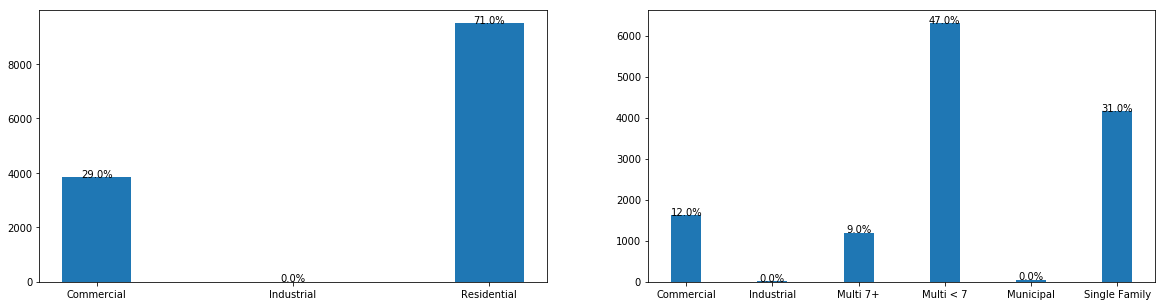

In [186]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
# fig, ax = plt.subplots(3, 2)

# energy_usage_select_cities.groupby('BUILDING TYPE').size().plot.bar()

arr = energy_usage_select_cities.groupby('BUILDING TYPE').size().reset_index()

pps = plt.bar(arr['BUILDING TYPE'], arr[0], 0.35, align='center')

for p in pps:
   height = p.get_height()
   height_pct = height/len(energy_usage_select_cities)
   plt.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(np.round(height_pct*100),2),
      ha='center')

plt.subplot(1, 2, 2)

# energy_usage_select_cities.groupby('BUILDING_SUBTYPE').size().plot.bar()

arr = energy_usage_select_cities.groupby('BUILDING_SUBTYPE').size().reset_index()

pps = plt.bar(arr['BUILDING_SUBTYPE'], arr[0], 0.35, align='center')

for p in pps:
   height = p.get_height()
   height_pct = height/len(energy_usage_select_cities)
   plt.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
     s="{}%".format(np.round(height_pct*100),2),
      ha='center')

plt.show()

In [99]:
energy_usage_select_cities.groupby(['BUILDING TYPE', 'BUILDING_SUBTYPE']).size()

BUILDING TYPE  BUILDING_SUBTYPE
Commercial     Commercial          1623
               Multi 7+             529
               Multi < 7           1643
               Municipal             55
Industrial     Industrial             9
Residential    Multi 7+             669
               Multi < 7           4668
               Single Family       4165
dtype: int64

### Distribution of total population, total units, Building Age, Housesize, Occupied Units Percentage, Renter Units Percentage

- Total population and total units are positively skewed
- Average household size is between 2-3
- More buildings are 80 years age or extremely new as we find two peaks
- Most of the buildings are 80-90% occupied. Renters occupy over 60% of the buildings

<Figure size 720x360 with 0 Axes>

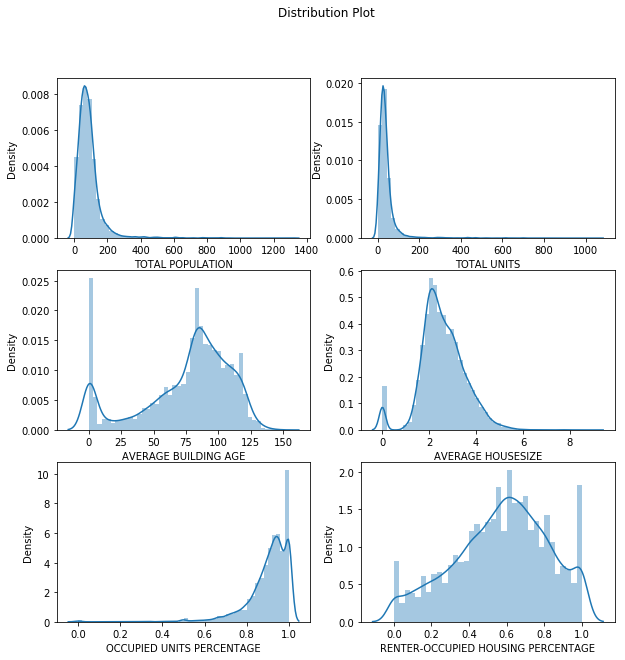

In [615]:
# residential = energy_usage_select_cities[energy_usage_select_cities['BUILDING TYPE']=='Residential']

fig = plt.figure(figsize=(10, 5))

plt.rcParams["figure.figsize"] = (10, 10)


fig, ax = plt.subplots(3, 2)

fig.suptitle('Distribution Plot')


sns.distplot(energy_usage_select_cities['TOTAL POPULATION'], ax=ax[0,0])

sns.distplot(energy_usage_select_cities['TOTAL UNITS'], ax=ax[0,1])

sns.distplot(energy_usage_select_cities['AVERAGE BUILDING AGE'], ax=ax[1,0])

sns.distplot(energy_usage_select_cities['AVERAGE HOUSESIZE'], ax=ax[1,1])

sns.distplot(energy_usage_select_cities['OCCUPIED UNITS PERCENTAGE'], ax=ax[2,0])

sns.distplot(energy_usage_select_cities['RENTER-OCCUPIED HOUSING PERCENTAGE'], ax=ax[2,1])



plt.show()

### Distribution by Building Types

- Most of the commercial buildings are new while most residential buildings are old
- Average household size is higher in residential buildings

<Figure size 720x720 with 0 Axes>

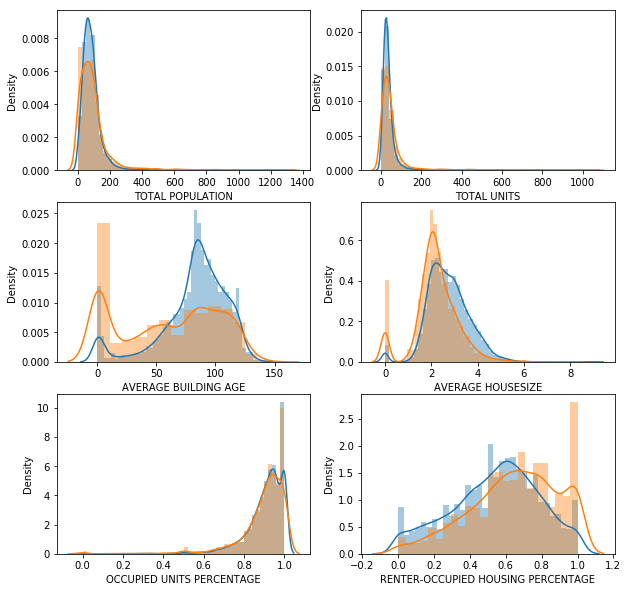

In [635]:
residential = energy_usage_select_cities[energy_usage_select_cities['BUILDING TYPE']=='Residential']

commercial = energy_usage_select_cities[energy_usage_select_cities['BUILDING TYPE']=='Commercial']

fig = plt.figure(figsize=(10, 10))

plt.rcParams["figure.figsize"] = (10, 10)

fig, ax = plt.subplots(3, 2)

# sns.displot(energy_usage_select_cities, x = 'TOTAL POPULATION', hue='BUILDING TYPE', kind='kde', ax=ax[0,0])

sns.distplot(residential['TOTAL POPULATION'], ax=ax[0,0], label='Residential')

sns.distplot(commercial['TOTAL POPULATION'], ax=ax[0,0], label='Commercial')



sns.distplot(residential['TOTAL UNITS'], ax=ax[0,1])

sns.distplot(commercial['TOTAL UNITS'], ax=ax[0,1])


sns.distplot(residential['AVERAGE BUILDING AGE'], ax=ax[1,0])

sns.distplot(commercial['AVERAGE BUILDING AGE'], ax=ax[1,0])


sns.distplot(residential['AVERAGE HOUSESIZE'], ax=ax[1,1])

sns.distplot(commercial['AVERAGE HOUSESIZE'], ax=ax[1,1])


sns.distplot(residential['OCCUPIED UNITS PERCENTAGE'], ax=ax[2,0])

sns.distplot(commercial['OCCUPIED UNITS PERCENTAGE'], ax=ax[2,0])


sns.distplot(residential['RENTER-OCCUPIED HOUSING PERCENTAGE'], ax=ax[2,1])

sns.distplot(commercial['RENTER-OCCUPIED HOUSING PERCENTAGE'], ax=ax[2,1])

plt.show()



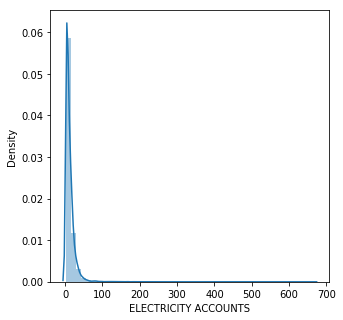

In [196]:
fig = plt.figure(figsize=(5, 5))


energy_usage_select_cities_town_nonnull_eaccounts = energy_usage_select_cities[~energy_usage_select_cities['ELECTRICITY ACCOUNTS'].isnull()]

energy_usage_select_cities_town_nonnull_eaccounts['ELECTRICITY ACCOUNTS'] = energy_usage_select_cities_town_nonnull_eaccounts['ELECTRICITY ACCOUNTS'].apply(lambda x : 3 if x=='Less than 4' else int(x))

sns.distplot(energy_usage_select_cities_town_nonnull_eaccounts['ELECTRICITY ACCOUNTS'])

In [177]:
energy_usage_select_cities.groupby('BUILDING TYPE').agg({'KWH MEAN 2010':'mean'}).reset_index()

,BUILDING TYPE,KWH MEAN 2010
0,Commercial,68953.136797
1,Industrial,69144.814286
2,Residential,14182.202319


### As expected, commercial and industrial buildings have higher average consumption than residential buildings

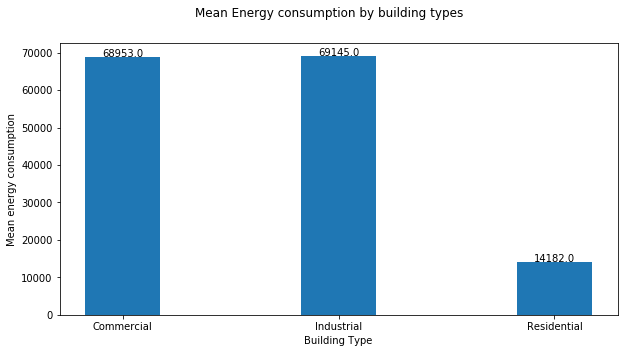

In [639]:

fig = plt.figure(figsize=(10, 5))

fig.suptitle('Mean Energy consumption by building types')

plt.xlabel('Building Type')

plt.ylabel('Mean energy consumption')

# energy_usage_select_cities.groupby('BUILDING TYPE').agg({'KWH MEAN 2010':'mean'}).plot.bar()
arr = energy_usage_select_cities.groupby('BUILDING TYPE').agg({'KWH MEAN 2010':'mean'}).reset_index()

pps = plt.bar(arr['BUILDING TYPE'], arr['KWH MEAN 2010'], 0.35, align='center')

for p in pps:
   height = p.get_height()
   plt.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(np.round(height),2),
      ha='center')


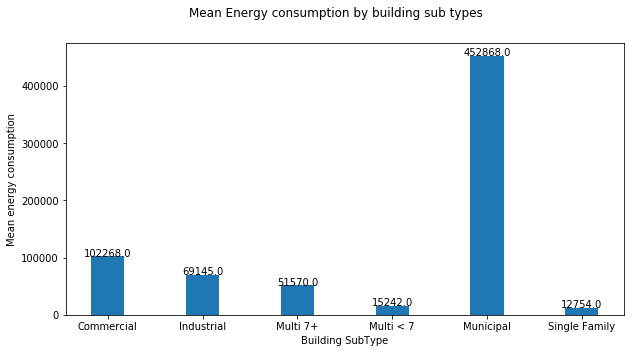

In [640]:
# energy_usage_select_cities.groupby('BUILDING_SUBTYPE').agg({'KWH MEAN 2010':'mean'}).plot.bar()
fig = plt.figure(figsize=(10, 5))


fig.suptitle('Mean Energy consumption by building sub types')

plt.xlabel('Building SubType')

plt.ylabel('Mean energy consumption')

arr = energy_usage_select_cities.groupby('BUILDING_SUBTYPE').agg({'KWH MEAN 2010':'mean'}).reset_index()

pps = plt.bar(arr['BUILDING_SUBTYPE'], arr['KWH MEAN 2010'], 0.35, align='center')

for p in pps:
   height = p.get_height()
   plt.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(np.round(height),2),
      ha='center')

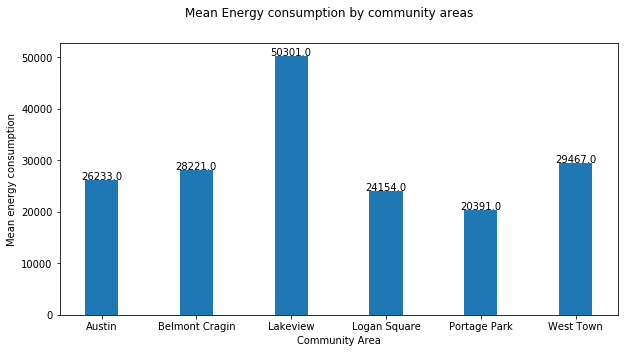

In [642]:
# energy_usage[energy_usage['COMMUNITY AREA NAME'].isin(['West Town','Austin','Logan Square','Lakeview'])] \
#   .groupby('COMMUNITY AREA NAME').agg({'KWH MEAN 2010':'mean'}).plot.bar()

# energy_usage_select_cities.groupby('BUILDING_SUBTYPE').agg({'KWH MEAN 2010':'mean'}).plot.bar()


fig = plt.figure(figsize=(10, 5))


fig.suptitle('Mean Energy consumption by community areas')

plt.xlabel('Community Area')

plt.ylabel('Mean energy consumption')

arr = energy_usage_select_cities.groupby('COMMUNITY AREA NAME').agg({'KWH MEAN 2010':'mean'}).reset_index()

pps = plt.bar(arr['COMMUNITY AREA NAME'], arr['KWH MEAN 2010'], 0.35, align='center')

for p in pps:
   height = p.get_height()
   plt.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}".format(np.round(height),2),
      ha='center')

### Building Type Distribution by community areas

- Austin, West Town and Lakeview has the most commercial buildings than other 3 areas

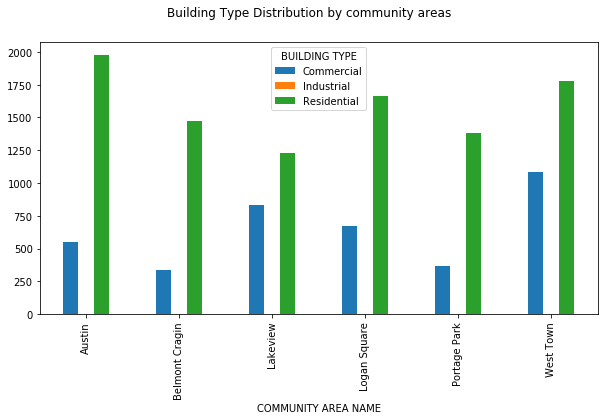

In [658]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111)
fig.suptitle('Building Type Distribution by community areas')

pd.crosstab(energy_usage_select_cities['COMMUNITY AREA NAME'], energy_usage_select_cities['BUILDING TYPE']).plot.bar(ax=ax)

plt.show()

#### Correlation Heatmap

- Multicollinearity between population, total units, occupied units, rental occupied units
- All the features here exhibit low correlation with the target variable. 

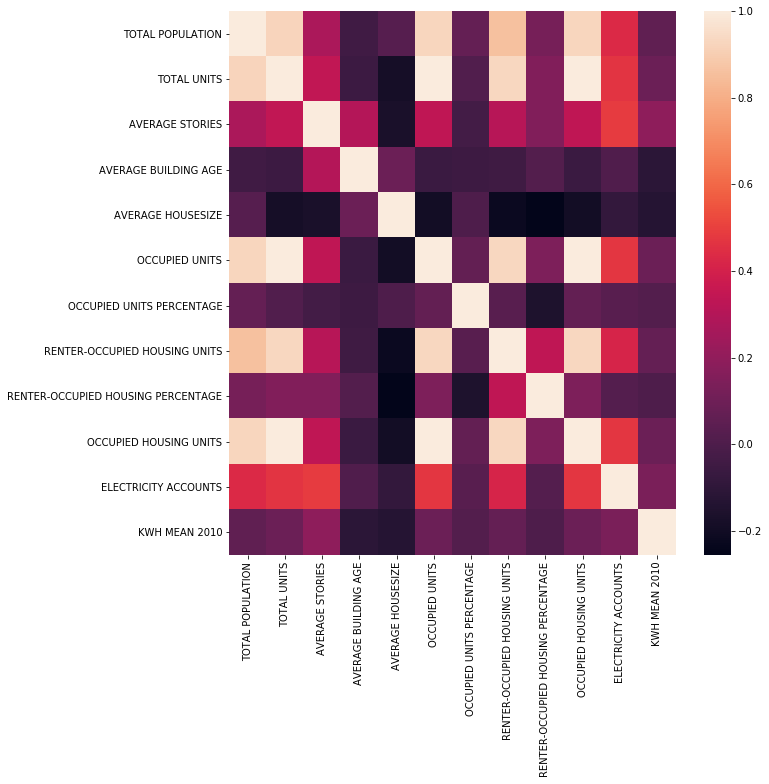

In [217]:
# corr = energy_usage_select_cities_town_nonnull_eaccounts[['TOTAL POPULATION', 'ELECTRICITY ACCOUNTS', 'AVERAGE STORIES',
#        'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE', 'OCCUPIED UNITS', 'KWH MEAN 2010']].corr()

corr = energy_usage_select_cities_town_nonnull_eaccounts[['TOTAL POPULATION', 'TOTAL UNITS', 'AVERAGE STORIES',
       'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE', 'OCCUPIED UNITS',
       'OCCUPIED UNITS PERCENTAGE', 'RENTER-OCCUPIED HOUSING UNITS',
       'RENTER-OCCUPIED HOUSING PERCENTAGE', 'OCCUPIED HOUSING UNITS', 'ELECTRICITY ACCOUNTS', 'KWH MEAN 2010']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [227]:
np.mean(energy_usage_select_cities[energy_usage_select_cities['OCCUPIED UNITS PERCENTAGE'].isnull()]['OCCUPIED UNITS'])

0.0

In [228]:
len(energy_usage_select_cities)

13361

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import category_encoders as ce   # version 1.2.8
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class StandardScalarMultiple(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        super().__init__()
        self.columns = columns
        self.normalizer = None

    def fit(self, X, y=None):
        self.normalizer = StandardScaler()
        self.normalizer.fit(X[self.columns])

        return self

    def transform(self, X, y=None):
        
        X_copy = X.copy()

        normalized_vals = self.normalizer.transform(X[self.columns])
        
        for i in range(0, len(self.columns)):
            col = [row[i] for row in normalized_vals]
            X_copy[self.columns[i]] = col
        

        return X_copy

### Filtering non occupied units

In [276]:
energy_usage_select_cities_nonull = energy_usage_select_cities[energy_usage_select_cities['OCCUPIED UNITS']>0.0]
energy_usage_select_cities_nonull = energy_usage_select_cities_nonull[~energy_usage_select_cities_nonull['KWH MEAN 2010'].isnull()]

In [277]:
energy_usage_select_cities_nonull['ELECTRICITY ACCOUNTS'] = energy_usage_select_cities_nonull['ELECTRICITY ACCOUNTS'].fillna(-1.0)

energy_usage_select_cities_nonull['ELECTRICITY ACCOUNTS'] = energy_usage_select_cities_nonull['ELECTRICITY ACCOUNTS'].apply(lambda x : 3 if x=='Less than 4' else int(x))


In [278]:
energy_usage_select_cities_nonull.columns

Index(['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE',
       'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010',
       'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS',
       'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010',
       'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
       'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010',
       'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010',
       'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT',
       'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010',
       'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010',
       'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010',
       'KWH SQFT STANDARD DEV

In [279]:
len(energy_usage_select_cities_nonull)

12833

In [282]:
len(energy_usage_select_cities[energy_usage_select_cities['ELECTRICITY ACCOUNTS'].isnull()])

141

# Write the preprocessed data

In [610]:
energy_usage_select_cities_nonull.to_csv('Energy_Usage_2010_preprocessed.csv', index=False, header=1)